# Problem Introduction

A friend of mine is a biologist and is working on a project involving [these little guys](http://www.encyclopediaofalabama.org/article/h-3898) who live in caves in Alabama.  There is genetic evidence that despite being extremely tiny and living in caves, they somehow manage to migrate from cave to cave, and it's not known how.  There are two hypthesis that researchers are comparing:
* They attatch themselves to bats who are known to migrate over large distances
* They travel through underwater streams from cave system to cave system

My friend's group ran some experiments simulating these two scenarios and wanted help thinking through the survival analysis problem.  Here's what they did.  They separated the scorpions into three populations.  

* The "control" group was kept under ideal conditions in a laboratory simulating their natural habitat.  Every day a researcher would test whether or not each specimen in the group was living or dead, and would record deaths.

* The "heat" group was kept in varying temperature conditions mimicking what would be encountered while clinging to a bat hurling through the Alabama sky.  Each day the scorpions were observed to determine if they were dead or alive.

* The "water" group was the tricky one.  At the start of the experiment, the researchers submerged the entire group.  Apparently scorpions go into a comatose state when submerged, and it takes them a long time to wake up.  You can't just observe them and return them to the water.  So what the researchers did was remove only 10 specimens from the water each day.  They then observed the scorptions over a period of time to determine how many woke up and how many died.  The dead were recorded, and the living were removed from the experiment.  Each day the experiment proceeded with ten fewer scorpions in the water group than the day before.

# The Data

* Control Group (control_data.csv)
   - sample_id: A unique identifier for each scorpion
   - treatment: Categorical variable.  C=control, H=heat, W=water 
   - duration: The duration (in days) the specimen remained in the experiment
   - died:  A flag indicating death.  
     - 1 = specimen died.  
     - 0 = specimen lived at least `duration` days
   
* Heat Group (heat_data.csv)
   - sample_id: A unique identifier for each scorpion
   - treatment: Categorical variable.  C=control, H=heat, W=water 
   - duration: The duration (in days) the specimen remained in the experiment
   - died:  A flag indicating death.  
     - 1 = specimen died.  
     - 0 = specimen lived at least `duration` days
  
* Water Group  (water_data.csv)
   - sample_id: A unique identifier for each scorpion
   - treatment: Categorical variable.  C=control, H=heat, W=water 
   - duration: The duration (in days) the specimen remained in the experiment
   - died:  A flag indicating death.  
       - 1 = specimen died in some unkown time less than `duration`
       - 0 = specimen lived at least `duration` days


# The analysis

Control


,sample_id,treatment,duration,died
0,OC9,C,3,1
1,OC95,C,26,0


Heat


,sample_id,treatment,duration,died
0,OC98,H,7,1
1,OC93,H,26,0


Water


,sample_id,treatment,duration,died
0,OC99,W,15,1
1,OC97,W,13,1


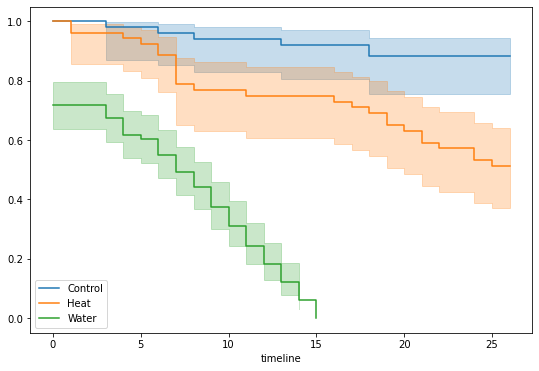

In [3]:
%config Completer.use_jedi = False
import lifelines as ll
import matplotlib.pyplot as pl
import pandas as pd
pd.options.display.max_rows = 300

ax = pl.subplots(1, 1, figsize=(9, 6))[1]

# Read in data
df_control = pd.read_csv('./control_data.csv')
df_heat = pd.read_csv('./heat_data.csv')
df_water = pd.read_csv('./water_data.csv')

# Display data for convenience
print('Control')
display(df_control.head(2))
print('Heat')
display(df_heat.head(2))
print('Water')
display(df_water.head(2))

# Control data is right-censored
control_fitter = ll.KaplanMeierFitter().fit(
    durations=df_control.duration, 
    event_observed=df_control.died, 
    label='Control'
)


# Heat data is right-censored
heat_fitter = ll.KaplanMeierFitter().fit(
    durations=df_heat.duration, 
    event_observed=df_heat.died, 
    label='Heat'
)

# Water data is left-censored  (I'm pretty sure??)
water_fitter = ll.KaplanMeierFitter().fit_left_censoring(
    durations=df_water.duration, 
    event_observed=df_water.died, 
    label='Water'
)


# Overlay survival curves on a plot
control_fitter.plot_survival_function(ax=ax)
heat_fitter.plot_survival_function(ax=ax)
water_fitter.plot_survival_function(ax=ax);

